# Bar Graph

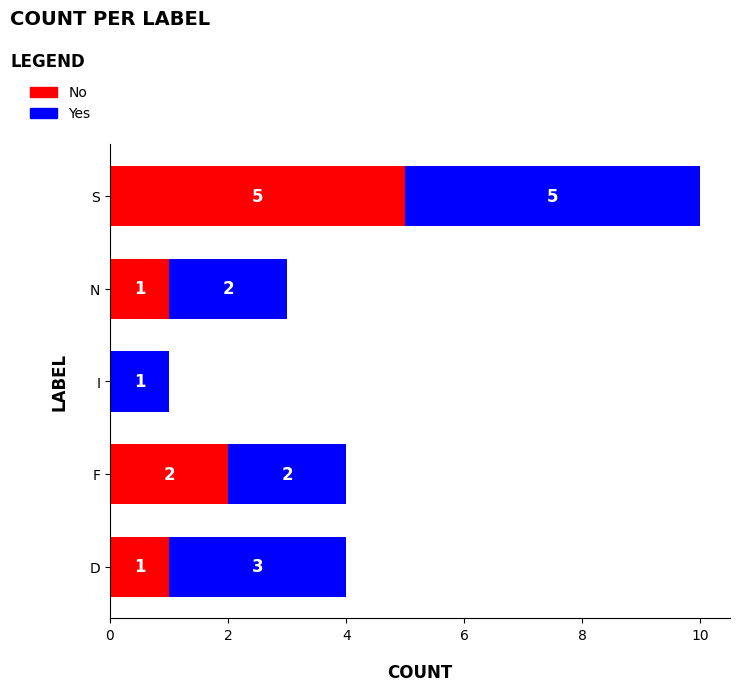

In [13]:
import pandas as pd

df = pd.read_csv('../datasets/bar_assignment.csv')  # Read CSV into a DataFrame
# print(df)  # Display first 5 rows
bar_width = 0.65

aggregated_df = df.groupby('LABEL', as_index=False).agg(
    label_occurrences=('LABEL', 'count'),  # Number of times each label appears
    yes_count=('COUNT', 'sum')  # Sum of COUNT values    
)
# print(aggregated_df)

aggregated_df['no_count'] = 0
aggregated_df['no_count'] = aggregated_df['label_occurrences'] - aggregated_df['yes_count']
# print(aggregated_df)

# Sample data (replace this with your actual DataFrame values)
labels = aggregated_df['LABEL']  # Y-axis categories
yes_counts = aggregated_df['yes_count']  # Yes values
no_counts = aggregated_df['no_count']  # No values

import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Move the title and legend above the plot using annotations
plt.figtext(0, 1.1, "COUNT PER LABEL", fontsize=14, fontweight='bold', ha='left')
plt.figtext(0, 1.03, "LEGEND", fontsize=12, fontweight='bold', ha='left')

# Custom legend using patches
legend_patches = [plt.Rectangle((0, 0), 1, 1, color='red', label='No'),
                  plt.Rectangle((0, 0), 1, 1, color='blue', label='Yes')]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(-0.15, 1.15), frameon=False)

# Plot "No" bars first
ax.barh(labels, no_counts, color='red', label='No', height=bar_width)

# Plot "Yes" bars on top
ax.barh(labels, yes_counts, color='blue', label='Yes', height=bar_width, left=no_counts)

# Add text labels inside bars
for i, (no, yes) in enumerate(zip(no_counts, yes_counts)):
    if no > 0: ax.text(no / 2, i, str(no), va='center', ha='center', fontsize=12, color='white', fontweight='bold')  # "No" bar
    ax.text(no + yes / 2, i, str(yes), va='center', ha='center', fontsize=12, color='white', fontweight='bold')  # "Yes" bar

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels
ax.set_xlabel('COUNT', fontsize=12, fontweight='bold', labelpad=15)
ax.set_ylabel('LABEL', fontsize=12, fontweight='bold', labelpad=15)

# Adjust layout so title & legend are above the plot
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


